In [7]:
import numpy as np
import pandas as pd 
import nltk
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB

  

In [9]:
sms=pd.read_csv('spam (1).csv', encoding='latin-1')
sms.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
print("number of rows", len(sms))

number of rows 5572


In [15]:
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [17]:
sms.describe()


,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
sms['lenght']=sms['text'].apply(len)
sms.head()

,label,text,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

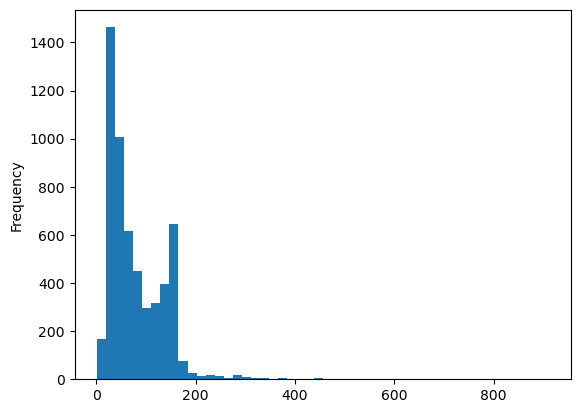

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['lenght'].plot(bins=50,kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

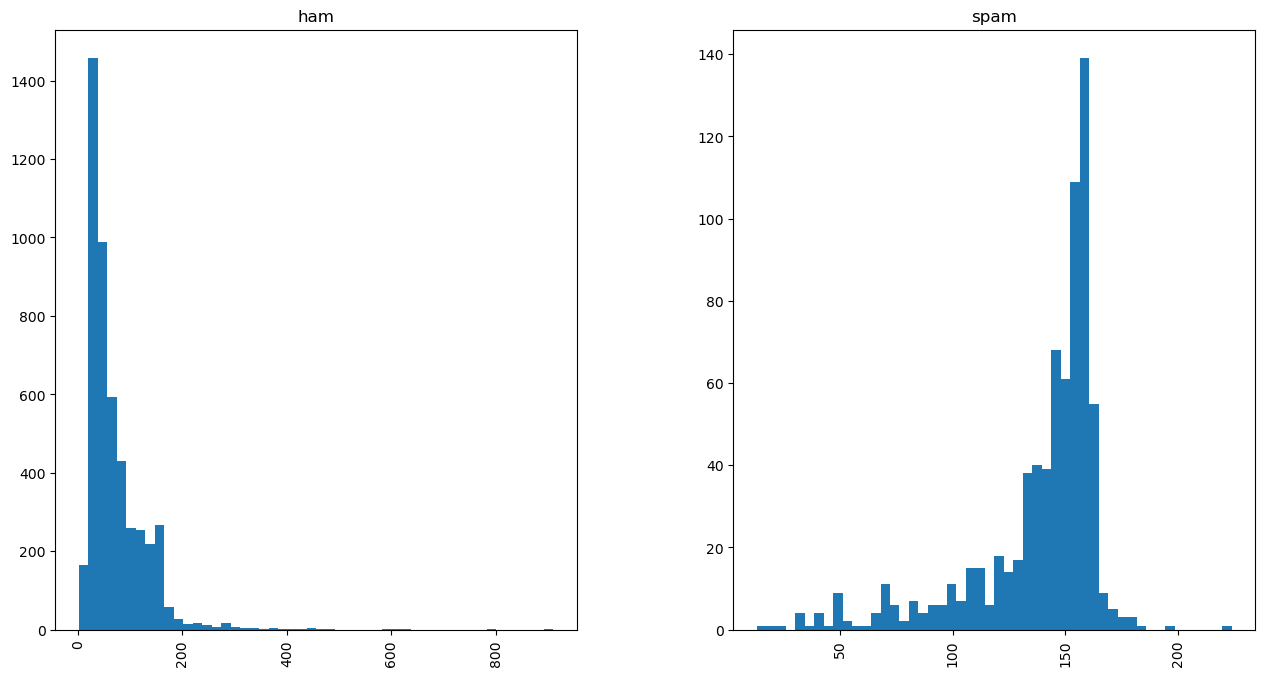

In [23]:
sms.hist(column='lenght', by='label' , bins=50 , figsize=(15,8))

In [25]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,lenght
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:

x_train, x_test, y_train, y_test =  train_test_split(sms['text'], sms['label'], test_size=0.20, random_state=1)

In [29]:
cv = CountVectorizer()
x_train_count  =  cv.fit_transform(x_train.values)

In [31]:
x_train

1642                             Sleeping nt feeling well
2899    Come aftr  &lt;DECIMAL&gt; ..now i m cleaning ...
480                          Almost there, see u in a sec
3485                     Yeah, probably earlier than that
157     Hello, my love. What are you doing? Did you ge...
                              ...                        
905     Hey what's up charles sorry about the late reply.
5192    Oh oh... Den muz change plan liao... Go back h...
3980    Huh i cant thk of more oredi how many pages do...
235     I have printed it oh. So  &lt;#&gt;  come upst...
5157                              K k:) sms chat with me.
Name: text, Length: 4457, dtype: object

In [33]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
y_train = np.array(y_train).astype(str)

In [55]:
import numpy as np
y_test = np.array(y_test, dtype=str)  # Example: Convert to string


In [57]:
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [59]:
sms_ham =["hey lets party"]
sms_ham_count = cv.transform(sms_ham)
model.predict(sms_ham_count)

array(['0'], dtype='<U1')

In [61]:
sms_spam=["reward money click ,congratulations "]
sms_spam_count= cv.transform(sms_spam)
model.predict(sms_spam_count) 

array(['1'], dtype='<U1')

In [63]:
#testing model now 
x_test_count = cv.transform(x_test) 
model.score(x_test_count , y_test) 

0.9847533632286996